In [1]:
import numpy as np
#from scipy.signal import gaussian
import matplotlib.pyplot as plt

In [98]:
def Pascals_triangle(n):
    ind = 1
    row = [0, 1, 0]
    while ind < n:
        row = [0] + [sum(row[i:i+2]) for i in range(len(row)-1)] + [0]
        ind += 1
    return row[1:-1]

def gaussian(x, x0, a, sigma):
    return a * np.exp(-(x-x0)**2/(2*sigma**2))
       

class Peak:
    def __init__(self, 
                 window=(10,0,1000),
                 shift=1.5, 
                 sigma=0.01, 
                 height=2, 
                 norm=False):
        self.window = np.linspace(*window)
        self.shift = shift
        self.sigma = sigma
        self.height = height
        self.norm=norm
        self.peak = [gaussian(self.window, self.shift, self.height, self.sigma)]
        if self.norm: self.peak[0] /= np.sum(self.peak[0])
        
    def split_peak(self, mult=2, J=0.1):
        intensities = Pascals_triangle(mult)
        peak = np.zeros(len(self.window))
        if mult%2==0:
            subpeak_shifts = [self.shift + J/2 + J*(mult-2)/2 - i*J for i in range(mult)]
        else:
            subpeak_shifts = [self.shift + J*mult//2 - i*J for i in range(mult)]
            
        for i in range(mult):
            peak += gaussian(self.window, 
                             subpeak_shifts[i],
                             intensities[i], 
                             self.sigma)
        self.peak.append(peak/(self.norm*np.sum(peak)))
        
"""
TODO: 
1) add function to individually shift peaks. this will be useful for next layers of spllitting
2) store each layer of splitting's shifts and intensities in addition to the peak. this will be 
useful for properly shifting and re scaling the peaks for each new layer of splittings. With this,
after transforming all the shifts and intensities, the peaks can then be generated. 
3) GUI? Spectrum class that is a collection of peaks?
"""
        
    
    
        
        
        

(0.0, 0.5)

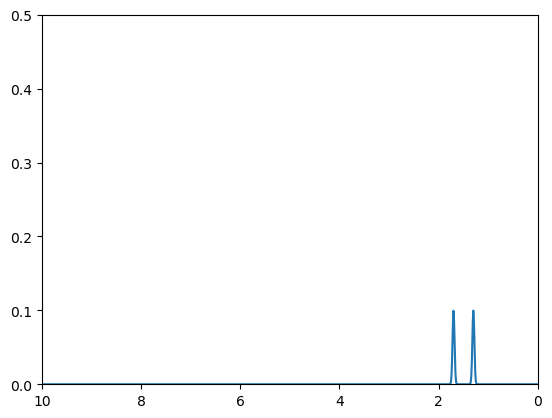

In [113]:
p = Peak(sigma=.02, norm=True)
p.split_peak(2, 0.4)

plt.plot(t, p.peak[-1])
plt.xlim(10, 0)
plt.ylim(0, 0.5)